In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [3]:
url = 'https://raw.githubusercontent.com/jimschenchen/public-storage/main/data/Hospitalizations.csv'

dataset = pd.read_csv(url).iloc[:, 1:]
dataset_train = dataset.sample(frac = 0.9)
dataset_test = dataset.drop(dataset_train.index)
print(len(dataset), len(dataset_train), len(dataset_test))

1019 917 102


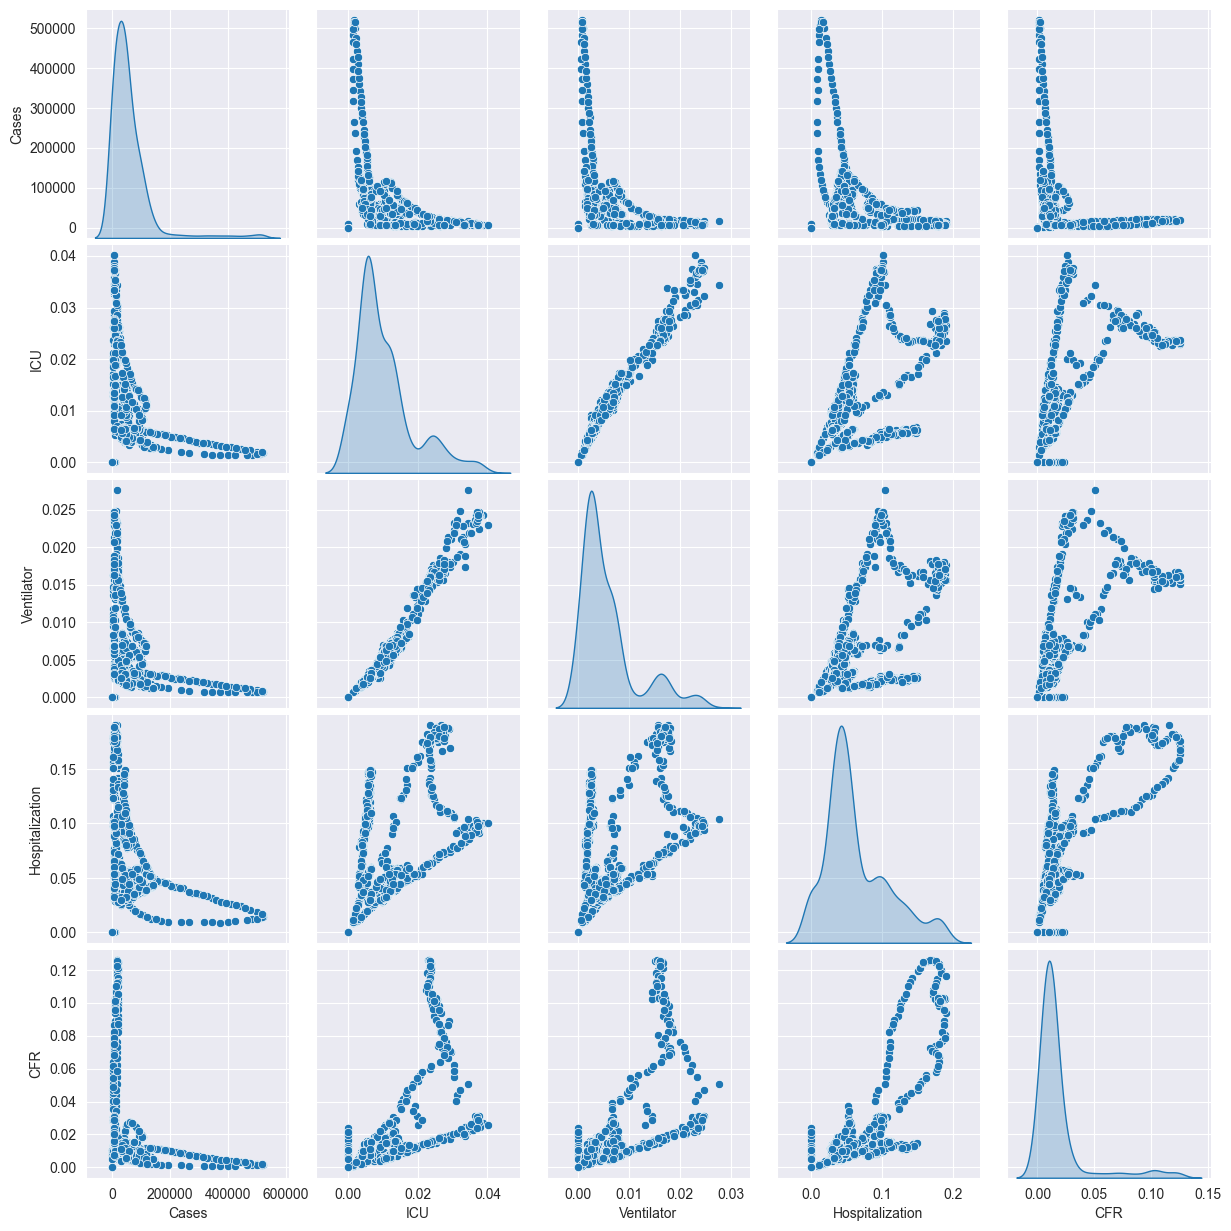

In [4]:
sns.pairplot(dataset_train[["Cases", "ICU", "Ventilator", "Hospitalization", "CFR"]], diag_kind="kde")

In [5]:
X_train = dataset_train.iloc[:, 0:1].values
Y_train = dataset_train.iloc[:, 1:2].values
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape, Y_train.shape)

(917, 1) (917, 1)


In [6]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam

In [7]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=1))


# optimizer = tf.keras.optimizers.RMSprop(0.008)
# model.compile(optimizer=optimizer,loss='mean_squared_error')
model.compile(optimizer=Adam(lr=0.0008), loss="mean_squared_error", metrics=['mse'])

model.fit(X_train,Y_train,epochs=100,batch_size=32)

C:\Users\loveb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
29/29 [==============================] - 0s 756us/step - loss: 16890068.0000 - mse: 16890068.0000
Epoch 2/100
29/29 [==============================] - 0s 824us/step - loss: 502542.6250 - mse: 502542.6250
Epoch 3/100
29/29 [==============================] - 0s 806us/step - loss: 26904.5117 - mse: 26904.5117
Epoch 4/100
29/29 [==============================] - 0s 787us/step - loss: 985.1850 - mse: 985.1850
Epoch 5/100
29/29 [==============================] - 0s 769us/step - loss: 129.8099 - mse: 129.8099
Epoch 6/100
29/29 [==============================] - 0s 751us/step - loss: 8.4673 - mse: 8.4673
Epoch 7/100
29/29 [==============================] - 0s 748us/step - loss: 0.2182 - mse: 0.2182
Epoch 8/100
29/29 [==============================] - 0s 698us/step - loss: 0.0139 - mse: 0.0139
Epoch 9/100
29/29 [==============================] - 0s 716us/step - loss: 0.0037 - mse: 0.0037
Epoch 10/100
29/29 [==============================] - 0s 699us/step - loss: 0.0032 - mse: 0.0032

In [8]:
X_test = dataset_test.iloc[:, 0:1].values
Y_test = dataset_test.iloc[:, 1:2].values
X_test, Y_test = np.array(X_test), np.array(Y_test)
print(X_test.shape, Y_test.shape)

(102, 1) (102, 1)


In [9]:
predicted_Y = model.predict(X_test)

4/4 [==============================] - 0s 674us/step


In [10]:
predicted_Y = predicted_Y.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predicted_Y)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
# plt.xlim([0, 60])
# plt.ylim([0, 60])
# plt.plot([-0.2, 0.2], [-0.2, 0.2])

Text(0.5, 1.0, 'A plot that shows the true and predicted values')

In [11]:
model.evaluate(X_test, Y_test, batch_size=128)

1/1 [==============================] - 0s 80ms/step - loss: 0.0100 - mse: 0.0100


[0.009952795691788197, 0.009952795691788197]

In [12]:
predicted_Y = model.predict(X_test[80:90])
predicted_Y

1/1 [==============================] - 0s 17ms/step


array([[-0.11794716],
       [-0.10427529],
       [-0.10232216],
       [-0.10720497],
       [-0.10451943],
       [-0.09743935],
       [-0.09914833],
       [-0.09304482],
       [-0.09157997],
       [-0.07717568]], dtype=float32)

In [13]:
Y_test[80:90]

array([[0.00563394],
       [0.0030634 ],
       [0.00295351],
       [0.00289024],
       [0.00395533],
       [0.00381185],
       [0.0042051 ],
       [0.00434915],
       [0.00436239],
       [0.00589072]])

In [14]:
predicted_Y = model.predict(X_train[:10])
predicted_Y

1/1 [==============================] - 0s 13ms/step


array([[-0.0071154 ],
       [-0.06948525],
       [-0.088162  ],
       [-0.05688149],
       [-0.056027  ],
       [-0.1091581 ],
       [-0.0713163 ],
       [-0.09646279],
       [-0.07815224],
       [-0.0935331 ]], dtype=float32)

In [15]:
Y_train[:10]

array([[0.        ],
       [0.01622415],
       [0.00435209],
       [0.02886287],
       [0.00847581],
       [0.00365368],
       [0.00657179],
       [0.00859392],
       [0.01208081],
       [0.0081782 ]])